In [1]:
from __init__ import *

print train_Y[:10]
HTML(train_X_orig.head(10).to_html())

['ZERO' 'ZERO' 'THE' 'A' 'ZERO' 'ZERO' 'ZERO' 'ZERO' 'THE' 'ZERO']


,_coordinates,_sent,a_head_form,a_head_number,a_head_pos,a_hypernyms,a_non_article_det,a_parent,a_pos_after_head,a_pos_before_head,a_referent,a_words_after_head,a_words_after_np,a_words_before_head,a_words_before_np
0,data/parsed/00/wsj_0001.mrg|1|4,"[ Pierre Vinken , ] 61 years old , will join t...",Vinken,sg,NNP,None,None,NP,"[,]",[NNP],False,"[,]","[<number>, year]",[Pierre],[]
1,data/parsed/00/wsj_0001.mrg|1|12,"Pierre Vinken , [ 61 years ] old , will join t...",year,pl,NN,[time_of_life.n.01],None,ADJP,[],[CD],False,[],"[old, ,]",[<number>],"[Vinken, ,]"
2,data/parsed/00/wsj_0001.mrg|1|27,"Pierre Vinken , 61 years old , will join [ the...",board,sg,NN,[committee.n.01],None,VP,[],[],False,[],[as],[],"[will, join]"
3,data/parsed/00/wsj_0001.mrg|1|35,"Pierre Vinken , 61 years old , will join the b...",director,sg,NN,[administrator.n.01],None,PP,[],[JJ],False,[],"[Nov., <number>]",[nonexecutive],"[board, as]"
4,data/parsed/00/wsj_0001.mrg|1|42,"Pierre Vinken , 61 years old , will join the b...",Nov.,sg,NNP,None,None,VP,"[CD, .]",[],False,"[<number>, .]",[],[],"[nonexecutive, director]"
5,data/parsed/00/wsj_0001.mrg|2|3,"[ Mr. Vinken ] is chairman of Elsevier N.V. , ...",Vinken,sg,NNP,None,None,S,[],[NNP],True,[],"[be, chairman]",[Mr.],[]
6,data/parsed/00/wsj_0001.mrg|2|12,"Mr. Vinken is [ chairman ] of Elsevier N.V. , ...",chairman,sg,NN,[presiding_officer.n.01],None,NP,[],[],False,[],"[of, Elsevier]",[],"[Vinken, be]"
7,data/parsed/00/wsj_0001.mrg|2|19,"Mr. Vinken is chairman of [ Elsevier N.V. , ] ...",N.V.,sg,NNP,None,None,NP,"[,]",[NNP],False,"[,]",[Dutch],[Elsevier],"[chairman, of]"
8,data/parsed/00/wsj_0001.mrg|2|26,"Mr. Vinken is chairman of Elsevier N.V. , [ th...",group,sg,NN,[abstraction.n.06],None,NP,[.],"[JJ, NN]",False,[.],[],"[Dutch, publishing]","[N.V., ,]"
9,data/parsed/00/wsj_0002.mrg|1|4,"[ Rudolph Agnew , ] 55 years old and former ch...",Agnew,sg,NNP,None,None,NP,"[,]",[NNP],False,"[,]","[<number>, year]",[Rudolph],[]


In [2]:
train_X_resolved = resolve_list_features(train_X_orig.ix[:,2:])
test_X_resolved = resolve_list_features(test_X_orig.ix[:,2:])

HTML(pandas.DataFrame([train_X_resolved[0]]).to_html())

,a_head_form,a_head_number,a_head_pos,a_non_article_det,a_parent,a_referent,"pah_,",pbh_NNP,"wah_,",wan_<number>,wan_year,wbh_Pierre
0,Vinken,sg,NNP,None,NP,False,True,True,True,True,True,True


In [3]:
remove_nans_from_dicts(train_X_resolved)
remove_nans_from_dicts(test_X_resolved)

HTML(pandas.DataFrame([train_X_resolved[0]]).to_html())

,a_head_form,a_head_number,a_head_pos,a_parent,a_referent,"pah_,",pbh_NNP,"wah_,",wan_<number>,wan_year,wbh_Pierre
0,Vinken,sg,NNP,NP,False,True,True,True,True,True,True


In [4]:
vec = DictVectorizer()
train_X = vec.fit_transform(train_X_resolved)
test_X = vec.transform(test_X_resolved)

In [5]:
model = LogisticRegression(solver='lbfgs' ,multi_class='multinomial')
model.fit(train_X, train_Y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print model.score(test_X, test_Y)

0.882680776014


<b>Lee's result</b> 0.877

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


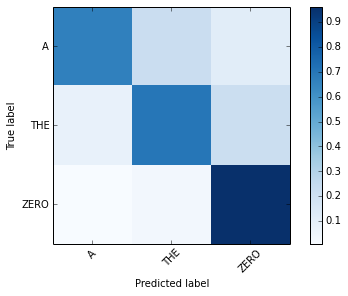

In [7]:
%matplotlib inline
import numpy
cm = confusion_matrix(test_Y, model.predict(test_X))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
y_names = numpy.unique(test_Y.ravel())
plot_cm(cm_normalized, y_names)

In [8]:
print cm
print cm_normalized

[[ 866  295  144]
 [ 210 1958  622]
 [  82  310 9688]]
[[ 0.66360153  0.22605364  0.11034483]
 [ 0.07526882  0.70179211  0.22293907]
 [ 0.00813492  0.03075397  0.96111111]]


In [9]:
export_errors(model.predict(test_X), test_Y, test_X_orig, log_path)